<a href="https://colab.research.google.com/github/JmarcoRT/quimicaPC1/blob/main/PC_2_Quimica_UNMSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()
element_symbols = []

for i in range(1,21):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))
  numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
  masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
  nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,21)]
  valencias = [PeriodicTable.GetValenceList(x) for x in range(1,21)]
import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data)
df

,nombre,simbolo,masa_atomica,numero_atomico,valencias
0,Hydrogen,H,1.008,1,[1]
1,Helium,He,4.003,2,[0]
2,Lithium,Li,6.941,3,"[1, -1]"
3,Beryllium,Be,9.012,4,[2]
4,Boron,B,10.812,5,[3]
5,Carbon,C,12.011,6,[4]
6,Nitrogen,N,14.007,7,[3]
7,Oxygen,O,15.999,8,[2]
8,Fluorine,F,18.998,9,[1]
9,Neon,Ne,20.180,10,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [25]:
def electrones_de_valencia(numero_atomico):
    numero_atomico = int(numero_atomico)

    if numero_atomico <= 2:
        return numero_atomico
    elif numero_atomico <= 10:
        return numero_atomico - 2
    elif numero_atomico <= 18:
        return numero_atomico - 10
    elif numero_atomico <= 36:
        return numero_atomico - 18
    elif numero_atomico <= 54:
        return numero_atomico - 36
    else:
        return numero_atomico - 54

if __name__ == "__main__":
    numero_atomico = input("Ingresa el número de protones: ")  # Número de protones como input
    valence_electrons = electrones_de_valencia(numero_atomico)
    print(f"Número de electrones de valencia para Z = {numero_atomico}: {valence_electrons}")



Ingresa el número de protones: 15
Número de electrones de valencia para Z = 15: 5


# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

In [18]:
!pip install rdkit

In [26]:
#ecuación química balanceada
COEF_R1 = 2
COEF_R2 = 3
COEF_P1 = 2
COEF_P2 = 2
reactant1 = "CC=CC"
reactant2 = "O=O"
product1 = "C(=O)=O"
product2 = "H2O"
print(f"{COEF_R1}{reactant1} + {COEF_R2}{reactant2} >> {COEF_P1}{product1} + {COEF_P2}{product2}")

2CC=CC + 3O=O >> 2C(=O)=O + 2H2O


## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [ ]:
!pip install rdkit


In [22]:
from rdkit import Chem
from rdkit.Chem import Draw

farmacos = ['O=C(Oc1ccccc1C(=O)O)C','CC(=O)Nc1ccc(cc1)O','O=Cc1ccc(O)c(OC)c1','CC(=O)NCCC1=CNc2c1cc(OC)cc2', 'CN1CCC[C@H]1c2cccnc2',
             "	O1C=C[C@H]([C@H]1O2)c3c2cc(OC)c4c3OC(=O)C5=C4CCC(=O)5", "	CCC[C@@H](O)CC\C=C\C=C\C#CC#C\C=C\CO", "CN=C=O", "CC[C@H](O1)CC[C@@]12CCCO2", "	CC(C)[C@@]12C[C@@H]1[C@@H](C)C(=O)C2"]


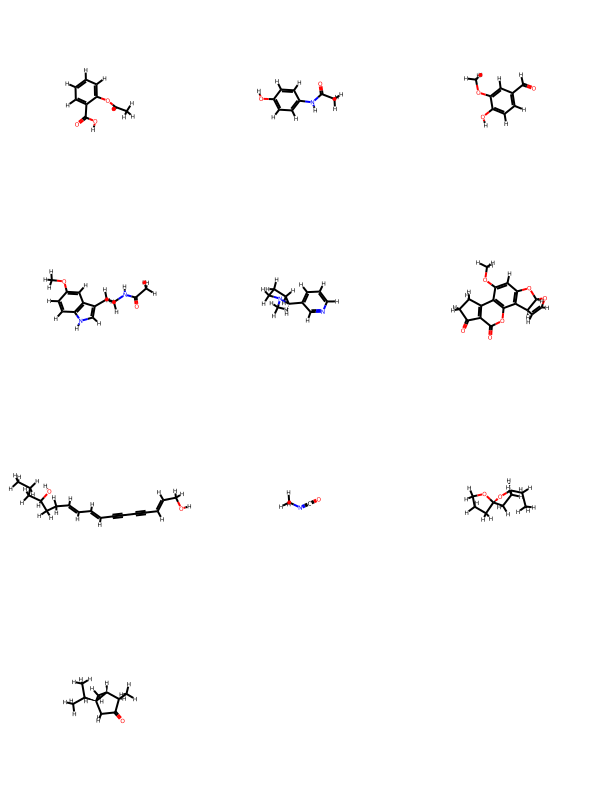

In [23]:
from rdkit.Chem import AllChem
mol_list = [Chem.MolFromSmiles(x) for x in farmacos]

imagen = Draw.MolsToGridImage(mol_list)
imagen
optimized_mol_list = []
for mol in mol_list:
    mol = Chem.AddHs(mol)  # Agregar hidrógenos a las moléculas para obtener una representación más realista.
    AllChem.EmbedMolecule(mol, randomSeed=42)  # Generar una conformación 3D inicial.
    AllChem.MMFFOptimizeMolecule(mol, maxIters=500, nonBondedThresh=200.0)  # Optimizar la geometría.
    optimized_mol_list.append(mol)
imagen_optimizada = Draw.MolsToGridImage(optimized_mol_list)
imagen_optimizada

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

En el estudio realizado por Soto-Ospina y Castro, se utilizó el método científico para abordar el problema de enseñar de manera efectiva el principio de Aufbau en la química. El objetivo era desarrollar un modelo didáctico de bajo costo utilizando cajas de huevos y esferas de ping-pong para explicar la configuración electrónica y la periodicidad de los elementos.
La metodología consistió en varias etapas. En primer lugar, se realizaron cortes en las cajas de huevos para representar los diferentes orbitales y se unieron dos cajas para representar los orbitales f. Además, se utilizó software de visualización de orbitales electrónicos para complementar el modelo físico.
Luego, se propuso la construcción de un "pasaporte atómico" donde los estudiantes podían identificar los elementos y su configuración electrónica. Se realizaron preguntas evaluativas para medir el aprendizaje de los estudiantes.
Los resultados mostraron que la mayoría de los estudiantes lograron comprender y aplicar los conceptos enseñados utilizando este modelo. Se concluyó que esta estrategia de aprendizaje activa y significativa es efectiva y puede ser fácilmente implementada en el aula.